*   Adapt matlab base model to python
*   Check the score (the final accuracy should be 95% or better)
*   Improve the model
*   Write the report


success!



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## read data



In [ ]:
def read_data(directory):
  doc =[]
  with open (directory, encoding = 'utf-8') as f:
    for lines in f:
      lines = lines.split()
      doc.append(lines)
  return doc

In [ ]:
data = read_data ('/content/gdrive/MyDrive/final_project/mfeat-pix.txt')

In [ ]:
# convert the strings into integers
for num in data:
  for i in range(len(num)):
    num[i] = int(num[i])

In [ ]:
# create y set
y_set = [[y]*100 for y in range (0,10)]
y_set = [x for num in y_set for x in num]

In [ ]:
def get_train(data):
  final_data =[]
  for i in range(0,2000,200):
    final_data.append(data[i:i+100])
  return final_data

def get_test(data):
  final_data = []
  for i in range(100, 2000, 200):
    final_data.append(data[i:i+100])
  return final_data

In [ ]:
x_train = [num for x in get_train(data) for num in x]
X_train =[]
shape =(16,15)
for x in x_train:
    a = np.reshape(np.array(x), shape)
    X_train.append(a)
  
X_train_cnn = np.array(X_train)
X_train = X_train_cnn.reshape(len(X_train_cnn), 240)


y_train = np.array(y_set)

x_test = [num for x in get_test(data) for num in x]
X_test =[]
for x in x_test:
    a = np.reshape(np.array(x), shape)
    X_test.append(a)
  
X_test_cnn = np.array(X_test)
X_test = X_test_cnn.reshape(len(X_test_cnn), -1)
y_test = np.array(y_set)


In [ ]:
X_test.shape

(1000, 240)

AttributeError: ignored

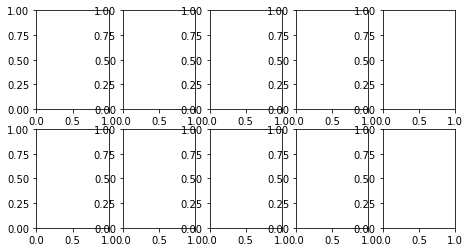

In [ ]:
import random
#Generate 5 random numbers between 10 and 30

num_row = 2
num_col = 5# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))

    a= i*random.sample((1,100),1)
    ax.imshow(X_train_cnn[i], cmap='gray')
    ax.set_title('Label: {}'.format(y_train[i]))
plt.tight_layout()
plt.show()



# def produce_image(num1, num2, num3, num4, num5, num6, num7, num8, num9, num10):
  # plt.imshow(X_train_cnn[i], 'binary')
  # plt.title(y_train[i])
  # plt.show

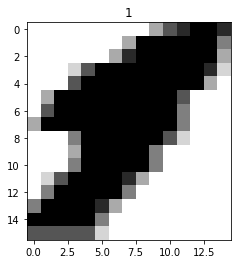

In [ ]:
produce_image(599)
produce_image(100)

#SVM 

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
# X_train = X_train/6
# X_test = X_test/6

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters_svm = {'kernel':['linear', 'rbf', 'sigmoid'], 'C': [0.5, 1.0, 2.0, 5.0, 10.0], 'gamma':[0.0001, 0.001, 0.01, 0.1]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters_svm)
clf.get_params().keys()
clf.fit(X_train, y_train)


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.5, 1.0, 2.0, 5.0, 10.0],
                         'gamma': [0.0001, 0.001, 0.01, 0.1],
                         'kernel': ['linear', 'rbf', 'sigmoid']})

In [ ]:
clf.best_params_
clf.cv_results_
clf.best_score_

0.977

In [ ]:
svm_classifier = svm.SVC(gamma=0.001)
svm_classifier.fit(X_train, y_train)
y_predict = svm_classifier.predict(X_test)
y_names = range(0,10)
print(accuracy_score(y_test, y_predict))
print(classification_report(y_set, y_predict))

0.975
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       100
           1       0.93      1.00      0.97       100
           2       0.99      1.00      1.00       100
           3       0.97      0.96      0.96       100
           4       0.98      0.99      0.99       100
           5       0.93      0.95      0.94       100
           6       1.00      0.95      0.97       100
           7       1.00      0.99      0.99       100
           8       0.98      0.97      0.97       100
           9       0.98      0.98      0.98       100

    accuracy                           0.97      1000
   macro avg       0.98      0.97      0.98      1000
weighted avg       0.98      0.97      0.98      1000



# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
parameters_tree = {'criterion':['gini', 'entropy'], 'min_samples_split':[2,4,6]}
clf_tree =GridSearchCV(DecisionTreeClassifier(), parameters_tree)
clf_tree.fit(X_train, y_train)
print(clf_tree.best_params_ ) 

{'criterion': 'entropy', 'min_samples_split': 2}


In [ ]:
clf_decisiontree = DecisionTreeClassifier()
clf_decisiontree.fit(X_train, y_train)
dt_pred = clf_decisiontree.predict(X_test)
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       100
           1       0.82      0.85      0.83       100
           2       0.92      0.87      0.89       100
           3       0.80      0.74      0.77       100
           4       0.94      0.91      0.92       100
           5       0.76      0.84      0.80       100
           6       0.85      0.92      0.88       100
           7       0.84      0.90      0.87       100
           8       0.92      0.76      0.83       100
           9       0.83      0.84      0.84       100

    accuracy                           0.86      1000
   macro avg       0.86      0.86      0.86      1000
weighted avg       0.86      0.86      0.86      1000



# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf_forest = RandomForestClassifier()
clf_forest.fit(X_train, y_train)
forest_pred = clf_forest.predict(X_test)
print(classification_report(y_test, forest_pred))
print(accuracy_score(y_test, forest_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       100
           1       0.95      0.99      0.97       100
           2       0.99      1.00      1.00       100
           3       0.94      0.97      0.96       100
           4       0.98      0.97      0.97       100
           5       0.96      0.94      0.95       100
           6       0.99      0.96      0.97       100
           7       0.99      0.98      0.98       100
           8       0.96      0.97      0.97       100
           9       0.96      0.96      0.96       100

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000

0.971


# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
GNB_classifier = GaussianNB()
GNB_classifier.fit(X_train, y_train)
y_pred = GNB_classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.894


# CNN Tenserflow

In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_test_mnist.shape
print(type(x_test_mnist))

<class 'numpy.ndarray'>


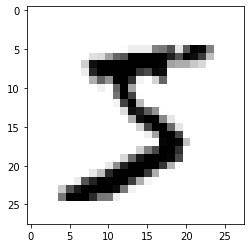

In [ ]:
plt.imshow(x_train_mnist[0], 'binary')

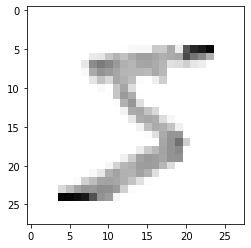

In [ ]:
x_train_mnist = tf.keras.utils.normalize(x_train_mnist, axis=1)
x_test_mnist = tf.keras.utils.normalize(x_test_mnist, axis=1)

plt.imshow(x_train_mnist[0], 'binary')


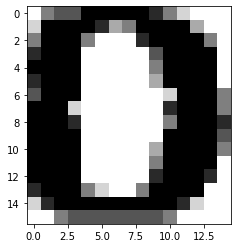

In [ ]:
plt.imshow(X_train_cnn[0], 'binary')

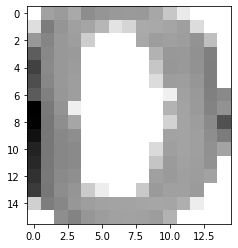

In [ ]:
x_train_cnn = tf.keras.utils.normalize(X_train_cnn, axis=0)
x_test_cnn = tf.keras.utils.normalize(X_test_cnn, axis=0)
plt.imshow(x_train_cnn[0], 'binary')

In [ ]:
print(x_train_cnn[0])

[[0.         0.03768297 0.03994013 0.03453799 0.04562639 0.04266601
  0.04077389 0.04058596 0.04089494 0.03519556 0.02255639 0.00847123
  0.         0.         0.        ]
 [0.01353082 0.05232647 0.04240945 0.03790793 0.03602321 0.02923377
  0.01155741 0.01714006 0.0342505  0.03464506 0.03599921 0.03831696
  0.01427516 0.         0.        ]
 [0.04120817 0.04882892 0.04119166 0.03903683 0.01973812 0.
  0.         0.         0.03473479 0.03944297 0.03816704 0.03939702
  0.04273413 0.02554788 0.        ]
 [0.06476054 0.04761605 0.04137242 0.04048882 0.         0.
  0.         0.         0.         0.03073016 0.04129298 0.04095587
  0.04392217 0.05147418 0.        ]
 [0.07564695 0.04691654 0.04124028 0.03959814 0.         0.
  0.         0.         0.         0.02286548 0.04166968 0.04077578
  0.04380612 0.05181857 0.        ]
 [0.07087388 0.04803075 0.0413508  0.03887752 0.         0.
  0.         0.         0.         0.014261   0.03943104 0.03880103
  0.04228289 0.05186502 0.        ]


In [ ]:
x_train_cnn = x_train_cnn.reshape(-1,16,15,1)
x_test_cnn = x_test_cnn.reshape(-1,16,15,1)

## Creating a Deep Neural network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [ ]:
model = Sequential()

#first convolution layer
model.add(Conv2D(32, (5,5), input_shape = x_train_cnn.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.3))

# model.add(Conv2D(16, (3,3), input_shape = x_train_cnn.shape[1:]))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size = (2,2)))
# model.add(Dropout(0.3))

# fully connected layer
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(32))
model.add(Activation('relu'))


# last fully connect layer
model.add(Dense(10))
model.add(Activation('softmax'))


In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 12, 11, 32)        832       
                                                                 
 activation (Activation)     (None, 12, 11, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 6, 5, 32)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 6, 5, 32)          0         
                                                                 
 flatten (Flatten)           (None, 960)               0         
                                                                 
 dropout_1 (Dropout)         (None, 960)               0         
                                                      

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics='accuracy')

Training the model

In [ ]:
model.fit(x_train_cnn, y_train, epochs=10, validation_split=0.3)

history =model.fit(X_train_cnn, y_train, epochs=10, validation_split=0.3)

Epoch 1/10
22/22 [==============================] - 0s 11ms/step - loss: 1.0409 - accuracy: 0.6714 - val_loss: 3.3194 - val_accuracy: 0.0600
Epoch 2/10
22/22 [==============================] - 0s 9ms/step - loss: 0.5506 - accuracy: 0.9000 - val_loss: 3.8900 - val_accuracy: 0.0100
Epoch 3/10
22/22 [==============================] - 0s 10ms/step - loss: 0.4489 - accuracy: 0.9257 - val_loss: 4.4513 - val_accuracy: 0.0000e+00
Epoch 4/10
22/22 [==============================] - 0s 9ms/step - loss: 0.3837 - accuracy: 0.9329 - val_loss: 4.8899 - val_accuracy: 0.0000e+00
Epoch 5/10
22/22 [==============================] - 0s 10ms/step - loss: 0.3748 - accuracy: 0.9243 - val_loss: 5.0720 - val_accuracy: 0.0000e+00
Epoch 6/10
22/22 [==============================] - 0s 9ms/step - loss: 0.3617 - accuracy: 0.9257 - val_loss: 5.2458 - val_accuracy: 0.0000e+00
Epoch 7/10
22/22 [==============================] - 0s 10ms/step - loss: 0.3409 - accuracy: 0.9357 - val_loss: 5.3739 - val_accuracy: 0.0000e

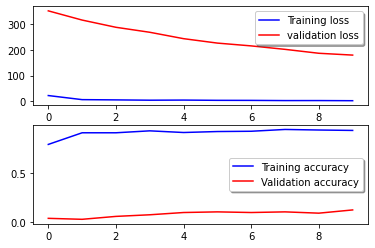

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
test_loss, test_acc = model.evaluate(X_test_cnn, y_test)
print(test_loss, test_acc)

32/32 [==============================] - 0s 3ms/step - loss: 57.2524 - accuracy: 0.6860
57.25244140625 0.6859999895095825


In [ ]:
pip install spacy


In [ ]:
import spacy
nlp= spacy.load('en_core_web_sm')

In [ ]:
def get_doc(directory):
  doc = open(directory).readlines()
  result =[]
  tok =[]
  for i, x in enumerate(doc):
    if x.startswith('# raw sent = '):
      x= x.replace('# raw sent = ', '').replace('\n', '')
      result.append(x)
    if x.startswith(('#', '###')) == False:
      x = x.split('\t')
      if len(x)>1:
        tok.append(x[0])
  return result, tok

In [ ]:
text,tok = get_doc('/content/gdrive/MyDrive/computational_semantics/train.txt')

In [ ]:
pos =[]
for sent in text:
  doc = nlp(sent)
  for token in doc:
    pos.append(token.pos_)



In [ ]:
print(text[:10])

['A girl is styling her hair', 'Tom asks his mother if she can but him a new toy.', 'This television is very heavy.', 'Kraft sold Celestial Seasonings.', '9 people were assassinated by Raman Raghav.', 'Charles de Gaulle died in 1970.', 'Our plane was flying above the clouds.', 'Bill is two years older than I.', 'John is not my brother, but my cousin.', 'I stretched out my hand for the book.']


In [ ]:
a =nlp('9 people were assassinated by Raman Raghav.')
for x in a:
  print(x.pos_, x.text)

NUM 9
NOUN people
AUX were
VERB assassinated
ADP by
PROPN Raman
PROPN Raghav
PUNCT .


In [ ]:
print(pos[:20])
print(tok[:20])

['DET', 'NOUN', 'AUX', 'VERB', 'DET', 'NOUN', 'PROPN', 'VERB', 'DET', 'NOUN', 'SCONJ', 'PRON', 'VERB', 'CCONJ', 'PRON', 'DET', 'ADJ', 'NOUN', 'PUNCT', 'DET']
['A', 'girl', 'is', 'styling', 'her', 'hair', 'Tom', 'asks', 'his', 'mother', 'if', 'she', 'can', 'but', 'him', 'a', 'new', 'toy', '.', 'This']


In [ ]:
print(len(pos))
print(len(tok))

103097
98870


In [ ]:
def get_doc(directory):
  doc = open(directory).readlines()
  result =[]
  for i, x in enumerate(doc):
    if x.startswith(('# ', '###'))==False:
      x= x.split('\t')
      result.append(x)
  return result
  
def get_data(doc):
  sent =[]
  for word in doc:
    if len(word)>0:
      tok =[]
      sem =[]
      if len(word) >3:
        tok.append(word[0])
        sem.append(word[3])
  return sent

In [ ]:
text = get_doc('/content/gdrive/MyDrive/computational_semantics/train.txt')

In [ ]:
for word in text[:10]:
  print(word)

['A', 'A', 'a', 'DIS', 'np/n', 'O', '[]\n']
['girl', 'girl', 'girl', 'CON', 'n', 'girl.n.01', '[]\n']
['is', 'is', 'be', 'NOW', '(s:dcl\\np)/(s:ng\\np)', 'O', '[]\n']
['styling', 'styling', 'style', 'EXG', '(s:ng\\np)/np', 'style.v.02', '[Patient,Agent]\n']
['her', 'her', 'female', 'HAS', 'np/n', 'female.n.02', '[PartOf]\n']
['hair', 'hair', 'hair', 'CON', 'n', 'hair.n.01', '[]\n']
['\n']
['Tom', 'Tom', 'tom', 'PER', 'n', 'male.n.02', '[]\n']
['asks', 'asks', 'ask', 'ENS', '((s:dcl\\np)/s:qem)/np', 'ask.v.02', '[Recipient,Topic,Agent]\n']
['his', 'his', 'male', 'HAS', 'np/(n/pp)', 'male.n.02', '[Of]\n']


In [ ]:
a=['jiaojdalfdk：dajfaljdl', 'lajdflajfdl,ljflajd', 'lakdjflaj:dlkjfaldf', 'aldkjalkd：ldjfkal']
for x in a:
  if '：' in x:
    print(x)

jiaojdalfdk：dajfaljdl
aldkjalkd：ldjfkal
